In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# using equations from https://keisan.casio.com/exec/system/1548128854

def second_order_runge_kutta_derivative(initial_y, initial_ypr, func, mesh):
    h = mesh[1] - mesh[0]
    

    y      = np.zeros( len(mesh) )
    y[0]   = initial_y

    ypr    = np.zeros( len(mesh) )
    ypr[0] = initial_ypr


    for i in np.arange(len(mesh) - 4 - 1):
        j1 = h * func( mesh[i],  y[i],  ypr[i] )
        k1 = h * ypr[i]

        j2 = h * func( mesh[i] + h/2,  y[i] + k1/2,  ypr[i] + j1/2 )
        k2 = h * (ypr[i] + j1/2)

        j3 = h * func( mesh[i] + h/2,  y[i] + k2/2,  ypr[i] + j2/2 )
        k3 = h * (ypr[i] + j2/2)

        j4 = h * func( mesh[i] + h,  y[i] + k3,  ypr[i] + j3 )
        k4 = h * (ypr[i] + j3)

        y[i + 1]   = y[i]   + (1/6) * (k1  + 2 * k2  +  2 * k3  +  k4)
        ypr[i + 1] = ypr[i] + (1/6) * (j1  + 2 * j2  +  2 * j3  +  j4)

    return (y, ypr)

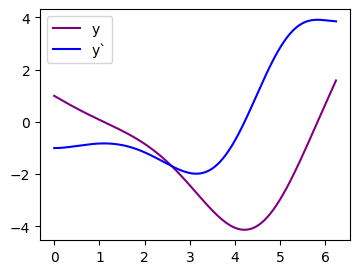

In [5]:
def foo_2(x, y, ypr):
    return np.sin(x) * y

n = 500

domain    = (0, 2 * np.pi)
test_mesh = np.linspace(domain[0], domain[1], n)
dx        = test_mesh[1] - test_mesh[0]

the_second_derivative = second_order_runge_kutta_derivative(1, -1, foo_2, test_mesh)

plt.figure(figsize=(4,3))
plt.plot(test_mesh[0:-4], the_second_derivative[0][0:-4], color = "purple", label = "y")
plt.plot(test_mesh[0:-4], the_second_derivative[1][0:-4], color = "blue"  , label = "y`")
plt.legend()
plt.show()